# Creating meshes in pyGIMLi

Resources used:

- <https://www.pygimli.org/_examples_auto/1_meshing/plot_hybrid-mesh-2d.html>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

Let's begin with the simplest mesh possible: a grid.

`pygimli.meshtools` provides the `createGrid` function:

Mesh has some geometric concepts like:

- Nodes: points in space
- Edges: lines connecting nodes
- Cells: polygons connecting edges
- Boundaries:
  - In 2D, they are the same as edges
  - In 3D, they are the outer edges of the mesh only

Every cell can be **marked**. This marking is used to classify the cells into
different regions. Also we can relate cells to physical properties by
referring to their markers.

In ERT different markers can represent different resistivity values.

> See also: `appendBoundaryGrid` for wrapping a grid with another one.

Mesh: Nodes: 169 Cells: 144 Boundaries: 312


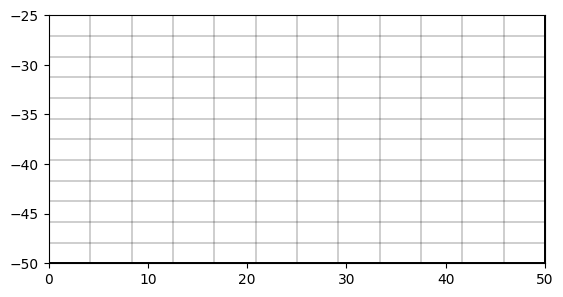

In [27]:
xmin, xmax = 0., 50.
zmin, zmax = -50., -25.

xreg = np.linspace(xmin, xmax, 13)
zreg = np.linspace(zmin, zmax, 13)

mesh1 = mt.createGrid(xreg, zreg, marker=2)
mesh1.setCellMarkers([2]*mesh1.cellCount()) # Set all cells with marker=2

pg.show(mesh1)
print(mesh1) # mesh information

Other mesh types:

Mesh: Nodes: 52 Cells: 77 Boundaries: 128


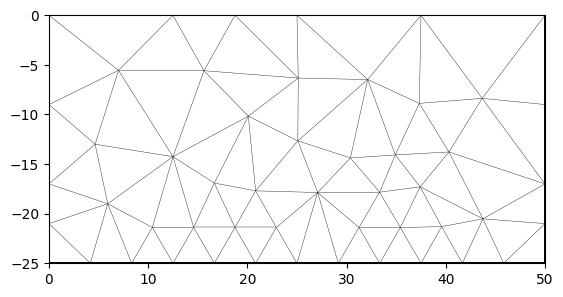

In [28]:
poly = pg.Mesh(2)  # empty 2d mesh
nStart = poly.createNode(xmin, zmax, 0.0)

nA = nStart
for x in xreg[1:]:
    nB = poly.createNode(x, zmax, 0.0)
    poly.createEdge(nA, nB)
    nA = nB

z2 = 0.
nA = poly.createNode(xmax, z2, 0.0)
poly.createEdge(nB, nA)
nB = poly.createNode(xmin, z2, 0.0)
poly.createEdge(nA, nB)
poly.createEdge(nB, nStart)

mesh2 = mt.createMesh(poly, quality=31)
mesh2.setCellMarkers([1]*mesh2.cellCount())

pg.show(mesh2)
print(mesh2)

Merging both `mesh1` and `mesh2`:

Mesh: Nodes: 208 Cells: 221 Boundaries: 428


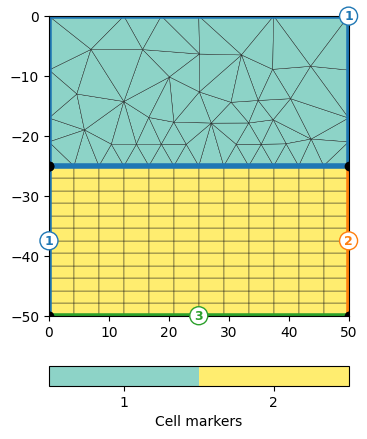

In [29]:
mesh3 = mt.mergeMeshes([mesh1, mesh2])

pg.show(mesh3, markers=True, showMesh=True)
print(mesh3)

Adding a mesh boundary. You can see mesh boundaries as mesh wrappers.

This is useful for ERT to simulate subsurface data:

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe004383dd0>)

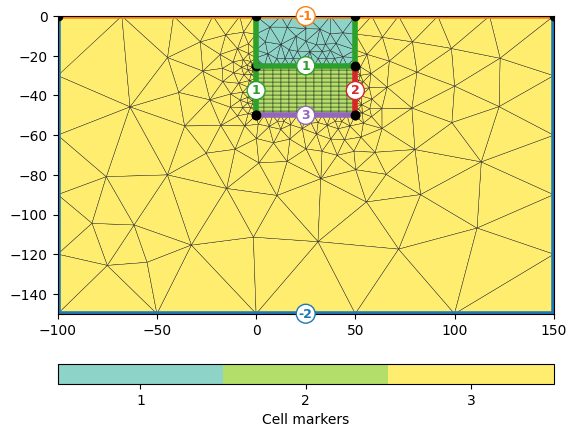

In [30]:
mesh = mt.appendTriangleBoundary(
    mesh3,
    xbound=100.,
    ybound=100.,
    quality=31,
    smooth=True,
    marker=3,
    isSubSurface=True,
    addNodes=5
)

# Note that we are showing the markers that we define previously
# Markers are what provide colors for our cells here
pg.show(mesh, markers=True, showMesh=True)